### Sale Insight Exploration and Recommendation

#### Loading the Dataset

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged dataset
df = pd.read_csv('data/merged_with_sentiment_and_polarity.csv')
df.head()
df.info()
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483333 entries, 0 to 483332
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             483333 non-null  int64  
 1   title              483333 non-null  object 
 2   text               483333 non-null  object 
 3   asin               483333 non-null  object 
 4   parent_asin        483333 non-null  object 
 5   user_id            483333 non-null  object 
 6   helpful_vote       483333 non-null  int64  
 7   verified_purchase  483333 non-null  bool   
 8   cleaned_text       483333 non-null  object 
 9   main_category      483333 non-null  object 
 10  product_title      483333 non-null  object 
 11  average_rating     483333 non-null  float64
 12  rating_number      483333 non-null  int64  
 13  price              483333 non-null  float64
 14  store              483333 non-null  object 
 15  details            483333 non-null  object 
 16  se

The dataset merged_with_sentiment_and_polarity.csv contains customer review information combined with sentiment and polarity scores.

df.head() shows the first 5 rows to get a quick look at the data.

df.info() summarizes the dataset structure, including column types and non-null counts.

df.columns.tolist() prints all column names to help identify the variables available for analysis.

#### Groupping Product level KPIs

In [29]:
# Group by product ID
product_kpis = df.groupby('parent_asin').agg({
    'price': 'mean',
    'rating': 'mean',
    'polarity': 'mean',
    'user_id': 'count'
}).reset_index().rename(columns={'user_id': 'num_reviews'})
print(product_kpis.head())


  parent_asin  price  rating  polarity  num_reviews
0  098834002X  19.99     5.0     0.320            1
1  099109462X  19.99     5.0     0.325            1
2  099113351X  19.99     4.5     0.174            4
3  111896229X  19.99     5.0     0.395            1
4  1259211282  16.00     3.5     0.195            2


Key performance indicators (KPIs) are calculated: Average Price, Rating, Sentiment Polarity score and Number of Reviews(user_id count).


The result is stored in a new DataFrame product_kpis, representing aggregated insights at the product level.

#### Groupping Category level  KPIs

In [30]:
# Group by category
category_kpis = df.groupby('main_category').agg({
    'rating': 'mean',
    'polarity': 'mean',
    'parent_asin': pd.Series.nunique,
    'user_id': 'count'
}).reset_index().rename(columns={'parent_asin': 'num_products', 'user_id': 'num_reviews'})
print(category_kpis.sort_values(by='polarity', ascending=False))

            main_category    rating  polarity  num_products  num_reviews
0  Health & Personal Care  3.995341  0.248463         59247       483333


#### Correlation analysis

                price    rating  polarity  num_reviews
price        1.000000  0.004114 -0.005185    -0.001156
rating       0.004114  1.000000  0.516910     0.009465
polarity    -0.005185  0.516910  1.000000    -0.000953
num_reviews -0.001156  0.009465 -0.000953     1.000000


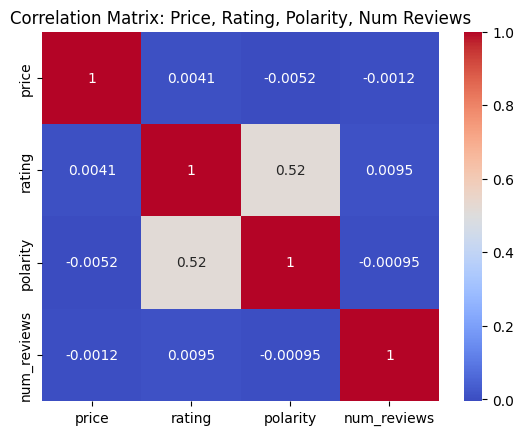

In [31]:
# Correlation of numeric KPIs
corr = product_kpis[['price', 'rating', 'polarity', 'num_reviews']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Price, Rating, Polarity, Num Reviews')
plt.show()

This section analyzes the correlation between key product-level metrics.

The corr() function computes Pearson correlation coefficients, which measure linear relationships between numerical features.

A heatmap is generated using Seaborn to visually interpret the correlation matrix:

Red shades indicate strong positive correlations.

Blue shades indicate negative correlations.

Lighter colors near zero suggest weak or no correlation.

#### Identify Top Performing Product

In [32]:
# Top products by polarity
top_sentiment_products = product_kpis.sort_values(by='polarity', ascending=False).head(10)
print(top_sentiment_products)


      parent_asin  price  rating  polarity  num_reviews
11388  B00LOYAGA0  19.99     5.0       1.0            1
18835  B01BV36SB4  19.99     5.0       1.0            1
40222  B07TV2HYHK  19.99     5.0       1.0            1
5604   B006MW89LW  19.99     5.0       1.0            1
14145  B00VMTGK2K  19.99     5.0       1.0            1
2890   B002F5EPNG  19.99     5.0       1.0            1
49574  B08GL1MQMJ  42.89     5.0       1.0            1
845    B000GCS9FU  19.99     5.0       1.0            1
14076  B00VBG5FE8  19.99     5.0       1.0            1
32296  B07C7YD4QD  19.99     5.0       1.0            1


C:\Users\User\AppData\Local\Temp\ipykernel_1668\1311668089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sentiment_products, x='polarity', y='parent_asin', palette='viridis')


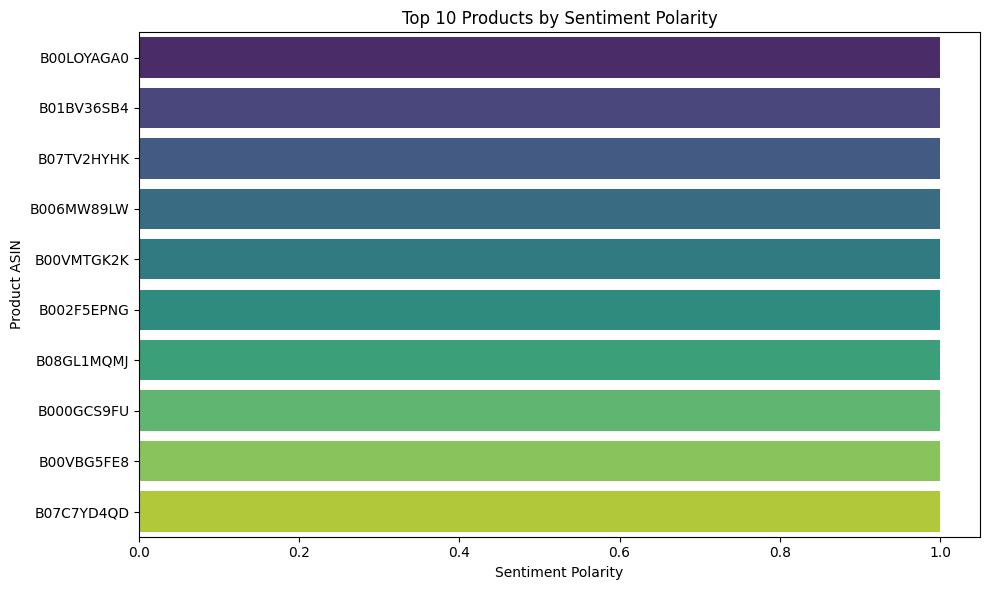

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_sentiment_products, x='polarity', y='parent_asin', palette='viridis')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Product ASIN')
plt.title('Top 10 Products by Sentiment Polarity')
plt.xlim(0, 1.05)  # Since polarity max is 1.0
plt.tight_layout()
plt.show()


In [34]:
# Top products by rating
top_rating_products = product_kpis.sort_values(by='rating', ascending=False).head(10)
print(top_rating_products)

      parent_asin  price  rating  polarity  num_reviews
14     156533535X  55.20     5.0     0.258            1
59246  B0CHQ69MCN  11.98     5.0     0.682            1
0      098834002X  19.99     5.0     0.320            1
1      099109462X  19.99     5.0     0.325            1
15     1569350450  19.99     5.0     0.263            2
3      111896229X  19.99     5.0     0.395            1
16     1579183468  20.95     5.0     0.235            2
17     158256048X  39.75     5.0     0.500            1
6      1323471022  19.99     5.0     1.000            1
7      1402512945  19.99     5.0     0.223            1


C:\Users\User\AppData\Local\Temp\ipykernel_1668\1530548356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rating_products, x='rating', y='parent_asin', palette='crest')


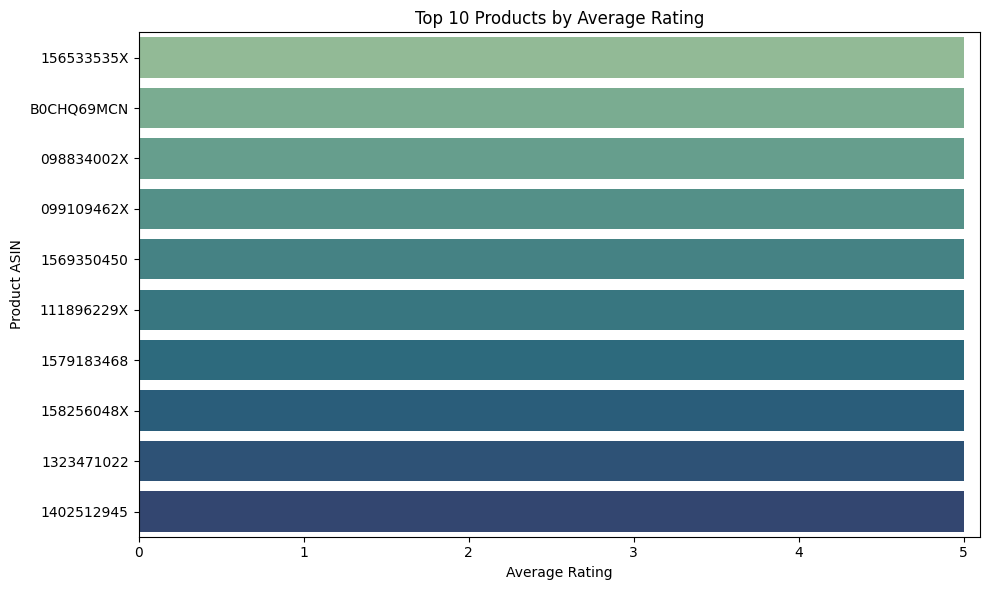

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_rating_products, x='rating', y='parent_asin', palette='crest')
plt.xlabel('Average Rating')
plt.ylabel('Product ASIN')
plt.title('Top 10 Products by Average Rating')
plt.xlim(0, 5.1)  # ratings typically between 1 and 5
plt.tight_layout()
plt.show()


Comparing both rating and polarity for each product.

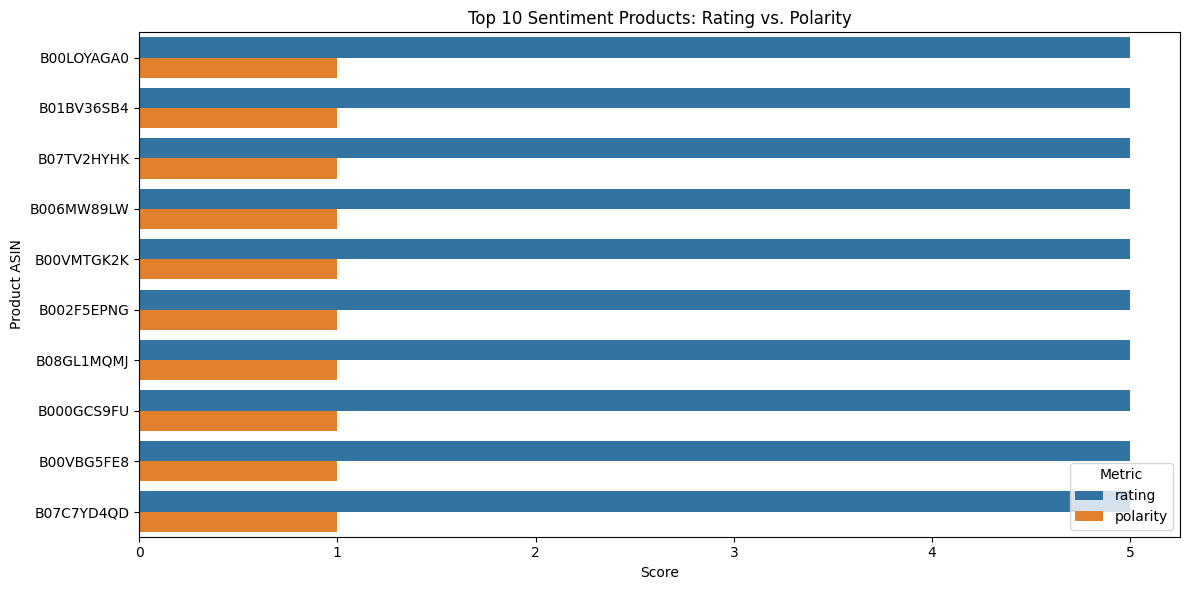

In [36]:
top_sentiment_products_plot = top_sentiment_products.melt(
    id_vars='parent_asin',
    value_vars=['rating', 'polarity'],
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_sentiment_products_plot, x='Score', y='parent_asin', hue='Metric')
plt.title('Top 10 Sentiment Products: Rating vs. Polarity')
plt.xlabel('Score')
plt.ylabel('Product ASIN')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


This section identifies the top 10 products based on:

Sentiment polarity: Measures how positively users have expressed opinions in their reviews.

Average rating: Reflects how users rated the product numerically (typically on a scale of 1 to 5).

Sorting is done in descending order, bringing the best-rated and most positively mentioned products to the top.

These insights help prioritize product promotion and can be integrated into recommendation engines.

#### Visualisation for price and polarity

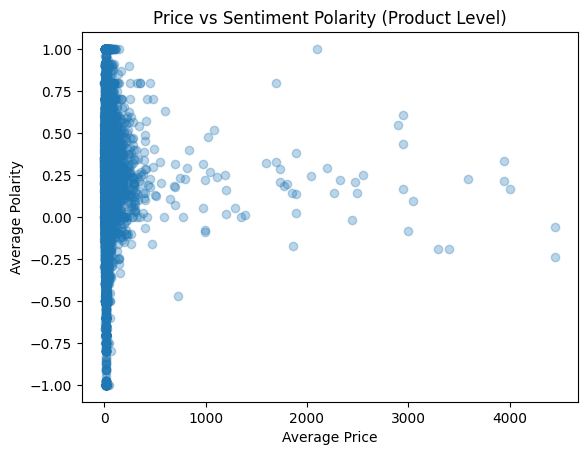

In [37]:
plt.scatter(product_kpis['price'], product_kpis['polarity'], alpha=0.3)
plt.xlabel('Average Price')
plt.ylabel('Average Polarity')
plt.title('Price vs Sentiment Polarity (Product Level)')
plt.show()

This scatter plot visualizes the relationship between a product’s price and its average sentiment polarity.


This helps determine whether more expensive products are associated with more positive or negative sentiments.

Insights from this can guide pricing strategies and product positioning in e-commerce.

#### Find Outlier Product

In [38]:
weak_products = product_kpis[
    (product_kpis['polarity'] < 0) & 
    (product_kpis['rating'] < 3) &
    (product_kpis['price'] > product_kpis['price'].mean())
]

print(weak_products)


      parent_asin   price    rating  polarity  num_reviews
281    B0001KHN2M  164.95  2.666667 -0.064667            3
793    B000FQTJXI   35.40  1.000000 -0.333000            1
886    B000GSXRFG  159.99  1.000000 -0.015500            2
1245   B000P4S2GK   82.21  1.000000 -0.078000            1
1642   B000YL95CE  259.99  2.500000 -0.100000            2
...           ...     ...       ...       ...          ...
58412  B0BB94Q7NB   29.99  1.833333 -0.010333            6
58607  B0BGPS4K7Z  139.90  2.000000 -0.250000            1
58840  B0BMF5KVB7   39.99  1.000000 -0.250000            1
59005  B0BRYL5JPW   49.00  1.000000 -0.312000            1
59153  B0BZW5K6YK   35.99  1.000000 -0.032000            1

[150 rows x 5 columns]


This code identifies underperforming or "weak" products based on three conditions:

Negative sentiment polarity (< 0)

Low average rating (less than 3)

Above-average price

Products meeting all three criteria are likely overpriced and poorly received by customers.

These products are candidates for further review, discounting, or removal from the catalog.

#### Sentiment and Number of Review

This shows whether more popular products maintain positive sentiment at scale.

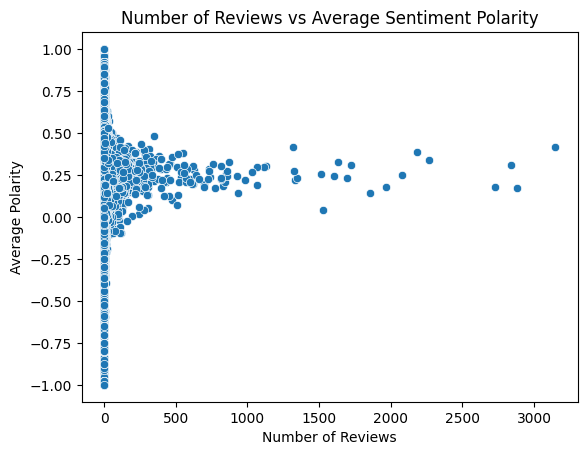

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=product_kpis, x='num_reviews', y='polarity')
plt.title('Number of Reviews vs Average Sentiment Polarity')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Polarity')
plt.show()


This scatter plot explores whether products with more reviews also maintain positive sentiment.

The X-axis represents number of reviews, and the Y-axis shows the average polarity.

These insights are useful for product reputation management and review-driven promotion strategies.


#### Identify Top Volume Products

This code selects the top 10 most-reviewed products from the dataset by sorting the num_reviews column in descending order. This can support inventory planning, promotional targeting, and recommendation prioritization.


In [40]:
top_volume = product_kpis.sort_values(by='num_reviews', ascending=False).head(10)
print(top_volume[['parent_asin', 'num_reviews', 'rating', 'polarity']])


      parent_asin  num_reviews    rating  polarity
59163  B0C1HHXQ94         3146  4.684361  0.417860
53261  B08X9LB1WC         2882  3.839348  0.169833
58027  B0B4328BFW         2839  4.304685  0.307128
19085  B01CKMP406         2727  4.048405  0.176765
4166   B0047VWYSO         2269  4.663288  0.339629
4234   B004C7MTLA         2182  4.733731  0.389283
299    B0001ZWPI4         2075  4.264578  0.248958
5806   B0077L8YFI         1969  3.180802  0.180807
12184  B00O0CK2UM         1854  3.398598  0.141674
7712   B00BR1FSU8         1722  4.361208  0.306693



These products have received the highest customer engagement and are potentially the most popular or widely purchased.

The output includes:

parent_asin: the unique product identifier,

num_reviews: total number of reviews,

rating: average customer rating,

polarity: average sentiment polarity of the reviews.

#### Sentiment by Category

This code computes the average sentiment polarity for each main product category by grouping the reviews.

It identifies which product categories are generally perceived positively by customers.

A horizontal bar plot is used to visualize the top 10 categories sorted by highest average sentiment.

            main_category  polarity
0  Health & Personal Care  0.248463


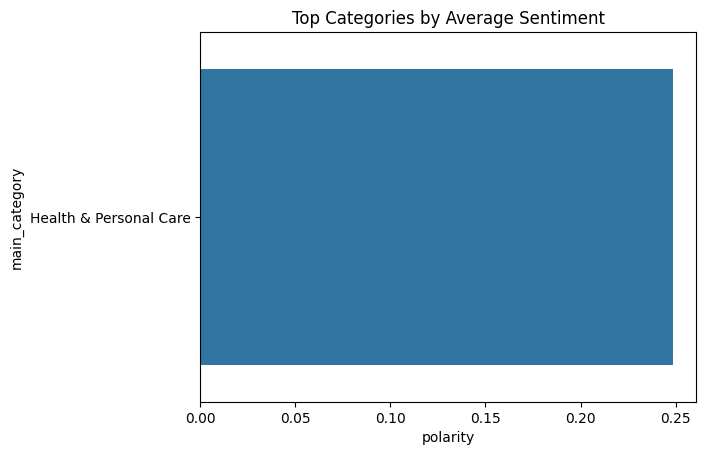

In [41]:
cat_sentiment = df.groupby('main_category')['polarity'].mean().reset_index().sort_values(by='polarity', ascending=False)
print(cat_sentiment)

sns.barplot(data=cat_sentiment.head(10), x='polarity', y='main_category')
plt.title('Top Categories by Average Sentiment')
plt.show()


#### Sentiment Impact of Sale Proxy

This scatter plot visualizes the relationship between average sentiment polarity and the number of reviews for each product.

This will provides insight into the correlation between customer sentiment and product popularity. Additionally, It assists marketing and sales teams in recognizing emotional drivers of customer behavior and optimizing offerings accordingly.

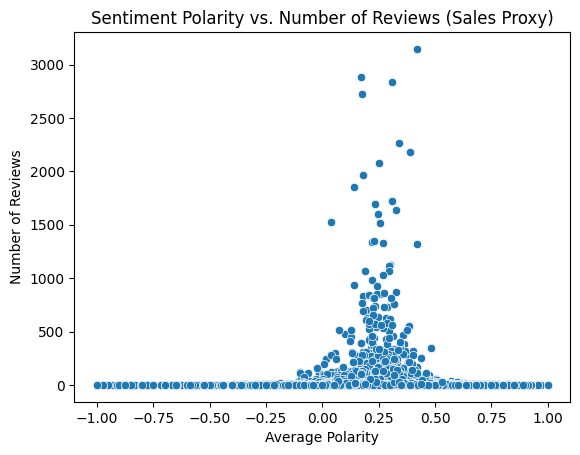

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Already computed: product_kpis with polarity and num_reviews
sns.scatterplot(data=product_kpis, x='polarity', y='num_reviews')
plt.title('Sentiment Polarity vs. Number of Reviews (Sales Proxy)')
plt.xlabel('Average Polarity')
plt.ylabel('Number of Reviews')
plt.show()


The num_reviews is used as a proxy for sales volume (more reviews usually indicate more purchases).

The visualization helps identify whether products with higher sentiment attract more customer engagement or sales.

#### High Satisfaction, Low Price

This will supports data-driven promotional strategy by surfacing products that can win customer loyalty and increase volume when featured and helps uncover undervalued products with potential for higher return on investment.

Find products that are low-priced but have high polarity + rating → good for promotions.e

In [43]:
hidden_gems = product_kpis[
    (product_kpis['price'] < product_kpis['price'].mean()) &
    (product_kpis['rating'] > 4.0) &
    (product_kpis['polarity'] > 0.5)
]

print(hidden_gems)


      parent_asin  price    rating  polarity  num_reviews
6      1323471022  19.99  5.000000  1.000000            1
28     1617013110  19.99  5.000000  0.577500            2
41     193354337X  19.99  5.000000  0.700000            1
46     193548236X  19.99  5.000000  0.514750            4
51     1938579992  19.99  5.000000  0.600000            1
...           ...    ...       ...       ...          ...
59117  B0BX72SWGF  17.80  5.000000  0.512000            1
59178  B0C2PXG21N  19.99  5.000000  0.635333            3
59231  B0C9QGJPPS  19.99  5.000000  0.800000            1
59237  B0CC1JMCJG  10.99  4.866667  0.530467           30
59246  B0CHQ69MCN  11.98  5.000000  0.682000            1

[6011 rows x 5 columns]


These items are ideal for promotions, bundling, or upselling, as they offer good value and high satisfaction at low cost.

#### High Price, Low Satisfaction

This performance  will useful for product quality control, pricing strategy, and customer service prioritization. These  find high-priced items with poor ratings & negative polarity.

In [44]:
overpriced_bad = product_kpis[
    (product_kpis['price'] > product_kpis['price'].mean()) &
    (product_kpis['rating'] < 3.0) &
    (product_kpis['polarity'] < 0)
]

print(overpriced_bad)


      parent_asin   price    rating  polarity  num_reviews
281    B0001KHN2M  164.95  2.666667 -0.064667            3
793    B000FQTJXI   35.40  1.000000 -0.333000            1
886    B000GSXRFG  159.99  1.000000 -0.015500            2
1245   B000P4S2GK   82.21  1.000000 -0.078000            1
1642   B000YL95CE  259.99  2.500000 -0.100000            2
...           ...     ...       ...       ...          ...
58412  B0BB94Q7NB   29.99  1.833333 -0.010333            6
58607  B0BGPS4K7Z  139.90  2.000000 -0.250000            1
58840  B0BMF5KVB7   39.99  1.000000 -0.250000            1
59005  B0BRYL5JPW   49.00  1.000000 -0.312000            1
59153  B0BZW5K6YK   35.99  1.000000 -0.032000            1

[150 rows x 5 columns]


This identifies overpriced products with:

Low ratings (< 3.0)

Negative sentiment (polarity < 0)

These items are likely underperforming or at risk, indicating dissatisfaction and pricing mismatch.